# Nucleosome Occupancy


Analysis of nucleosome occupancy during chromatin maturation.  I am naively defining occupancy as read depth (corrected for length) for the feature of interest.



Read in monica's cnm.df data frame

In [3]:
cnm.df <- read.csv("/data/home/mpg22/March_2017_chromatin_assembly/Merged_data/data_frames/cn_complete_okcorrected_ratios.csv", stringsAsFactors = F)


In [4]:
head(cnm.df)

X,EdU5_0_bulk,EdU5_30_bulk,EdU10_0_bulk,EdU10_30_bulk,inputs5_0_30,chr,gene,length,peaks,⋯,mid_dist_e,strand,start,end,mRNA,NET_seq,h2az_1_score,directionality,ratio,mid_ratio
1,0.9135431,0.8273183,0.8876251,0.8155849,0.9971008,chrI,YAL069W,315,2,⋯,9.540117,+,334,649,0.000000000,0.000000000,16.958007,4.1085245,-0.12211555,-0.07532292
2,0.9781685,0.9993220,0.9861984,0.9942133,0.9961717,chrI,YAL068W-A,255,2,⋯,5.547945,+,537,792,0.003921569,0.003921569,17.861484,2.8073549,0.01167761,-0.60654936
3,0.8143767,0.9263432,0.4484318,0.8916972,0.9808242,chrI,YAL068C,363,3,⋯,13.027397,-,1806,2169,0.011019284,0.022038567,22.313863,0.7776076,0.99166541,-1.06420963
4,0.9934882,0.9861784,0.9784249,0.9928258,0.9942989,chrI,YAL067W-A,228,2,⋯,9.825832,+,2479,2707,0.004385965,0.017543860,0.000000,0.2895066,0.02107955,0.71109071
5,0.7224885,0.8319213,0.4346318,0.8342221,0.9330314,chrI,YAL067C,1782,14,⋯,16.164384,-,7234,9016,0.020202020,0.047699214,4.575806,-2.7789731,0.94063786,0.15375568
6,0.8092933,0.8946042,0.6975887,0.5412692,0.9049782,chrI,YAL066W,309,3,⋯,15.761252,+,10090,10399,0.000000000,0.006472492,1.000000,2.2223924,-0.36603042,-0.08953853


## normalize occupancy data
Poor mans normalization -- will normalize on 3rd quarter.  The assumption being that these will represent the most occupied and 'full' genes.  Normalization factor is ~1.18 for sample d("mature").

In [11]:
summary(cnm.df$depth_c/cnm.df$length*1000)
summary(cnm.df$depth_d/cnm.df$length*1000)
summary(cnm.df$depth_e/cnm.df$length*1000)

norm<-1384/1169
norm


    Min.  1st Qu.   Median     Mean  3rd Qu.     Max. 
     6.8    823.6   1077.0   1224.0   1381.0 115400.0 

     Min.   1st Qu.    Median      Mean   3rd Qu.      Max. 
     5.67    690.70    903.80   1058.00   1169.00 106800.00 

     Min.   1st Qu.    Median      Mean   3rd Qu.      Max. 
     0.57    937.00   1140.00   1280.00   1384.00 116000.00 

[1] 1.183918

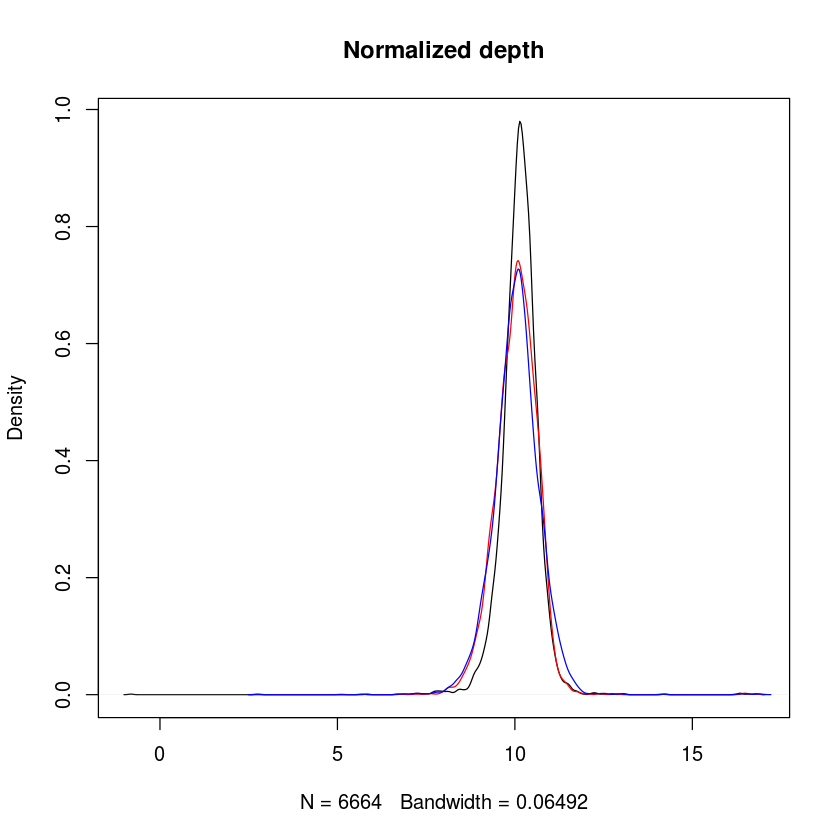

In [20]:
plot(density(log2(cnm.df$depth_e/cnm.df$length*1000)),'Normalized depth')
lines(density(log2(cnm.df$depth_c/cnm.df$length*1000)),col='red')
lines(density(log2(cnm.df$depth_d/cnm.df$length*1000*norm)),col='blue')



Warning message in bplt(at[i], wid = width[i], stats = z$stats[, i], out = z$out[z$group == :
“Outlier (-Inf) in boxplot 1 is not drawn”Warning message in bplt(at[i], wid = width[i], stats = z$stats[, i], out = z$out[z$group == :
“Outlier (-Inf) in boxplot 2 is not drawn”

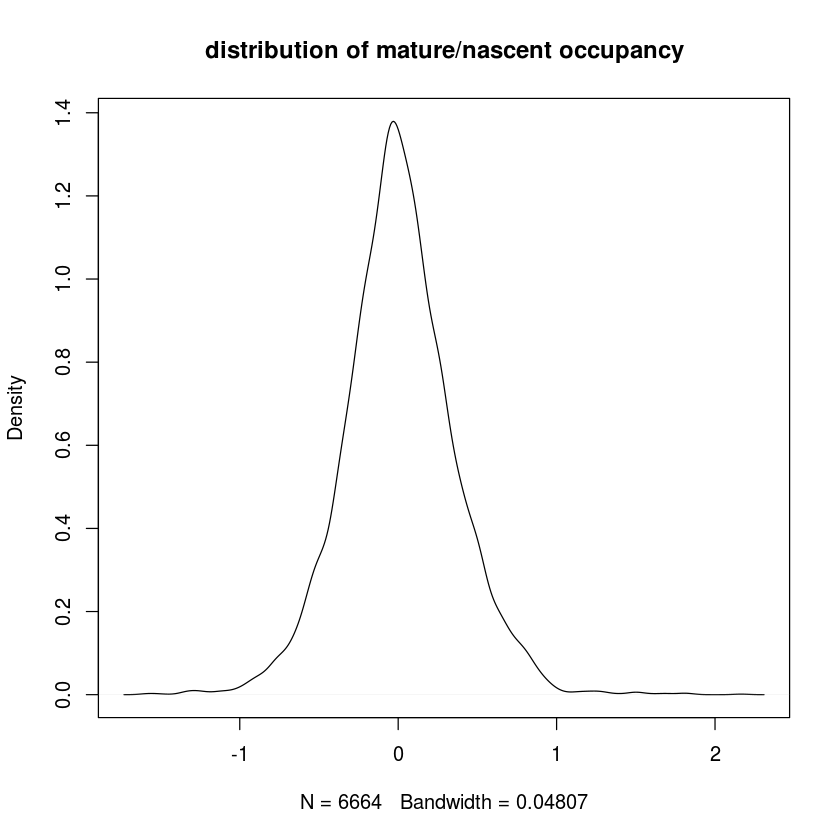

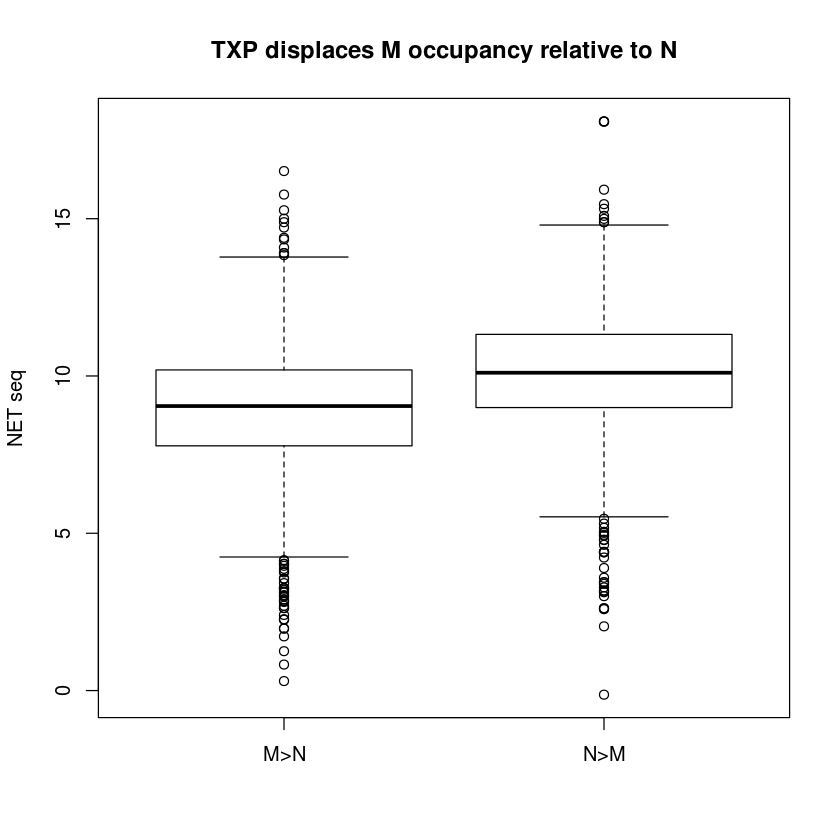

In [37]:
plot(density(log2(cnm.df$depth_d/cnm.df$length*1000*norm)-log2(cnm.df$depth_c/cnm.df$length*1000)),'distribution of mature/nascent occupancy')
top<-order(log2(cnm.df$depth_d/cnm.df$length*1000*norm)-log2(cnm.df$depth_c/cnm.df$length*1000),decreasing=T)[1:1000]
bot<-order(log2(cnm.df$depth_d/cnm.df$length*1000*norm)-log2(cnm.df$depth_c/cnm.df$length*1000),decreasing=F)[1:1000]
boxplot(log2(cnm.df$NET_seq[top]*1000),log2(cnm.df$NET_seq[bot]*1000),ylab='NET seq',names=c("M>N","N>M"),main='TXP displaces M occupancy relative to N')



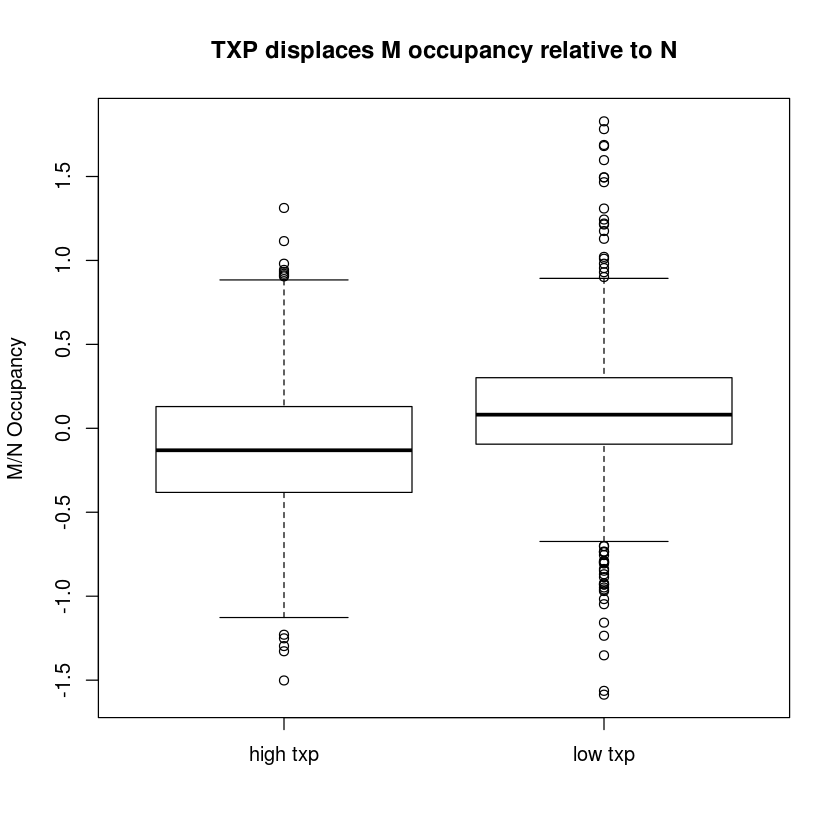

In [45]:
top<-order(log2(cnm.df$NET_seq),decreasing=T)[1:1000]
bot<-order(log2(cnm.df$NET_seq),decreasing=F)[1:1000]
           

           
boxplot( (log2(cnm.df$depth_d/cnm.df$length*1000*norm)-log2(cnm.df$depth_c/cnm.df$length*1000))[top] , (log2(cnm.df$depth_d/cnm.df$length*1000*norm)-log2(cnm.df$depth_c/cnm.df$length*1000))[bot] ,ylab='M/N Occupancy',names=c("high txp","low txp"),main='TXP displaces M occupancy relative to N')


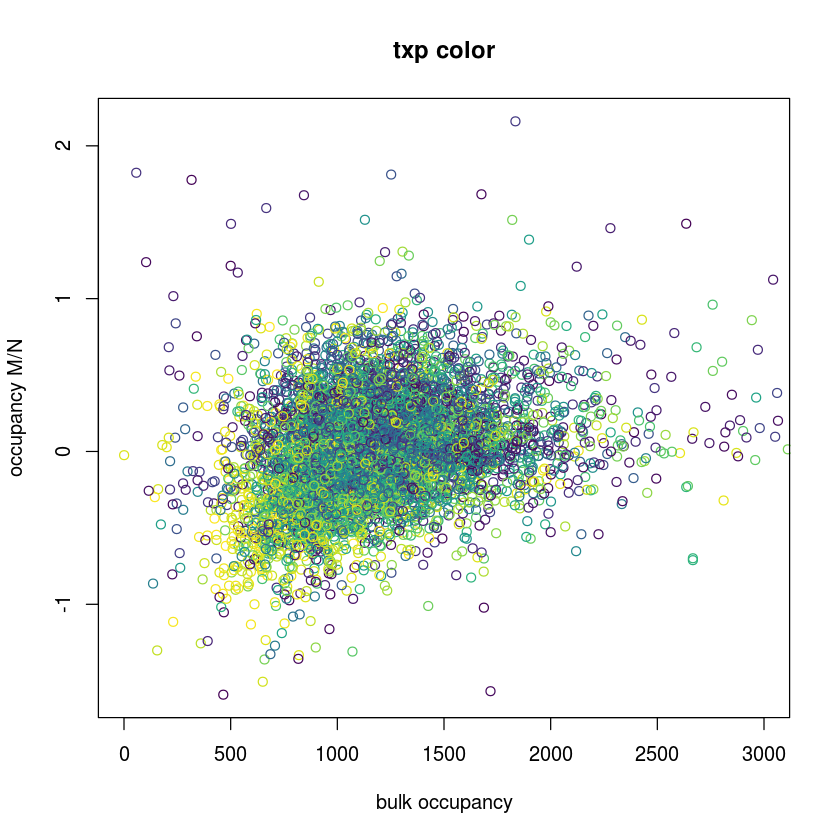

In [50]:
library(viridis)
cg <- viridis(6664, alpha = 1, begin = 0, end = 1, option = "D")

plot((cnm.df$depth_e*1000/cnm.df$length),log2(cnm.df$depth_d*1000/cnm.df$length*1.18)-log2(cnm.df$depth_c*1000/cnm.df$length),xlim=c(0,3000),col=cg[order(order(cnm.df$NET_seq))],main='txp color',xlab='bulk occupancy',ylab='occupancy M/N')